# <center><h1 style="font-family: Times New Roman; color: black;">Random Forest</h1></center>

# Dataset Description:

Use the Glass dataset and apply the Random forest model.

# 1. Exploratory Data Analysis (EDA):

1. Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

# 2: Data Visualization:

1. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
2. Analyze any patterns or correlations observed in the data.

# 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

# 4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

# 5: Bagging and Boosting Methods
1. Apply the Bagging and Boosting methods and compare the results.

# Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

# Solutions: 

# 1. Exploratory Data Analysis (EDA):

In [1]:
# Import Libraries
import pandas as pd

# Load the Excel file and list available sheet names
excel_file = pd.ExcelFile('glass.xlsx')

# Display the sheet names
excel_file.sheet_names

['Description', 'glass']

In [2]:
# Load Dataset from 'glass' sheet
glass_data = pd.read_excel('Glass.xlsx', sheet_name='glass')

# Display the first few rows to check the structure of the data
glass_data.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [3]:
# Check the column names and data structure
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

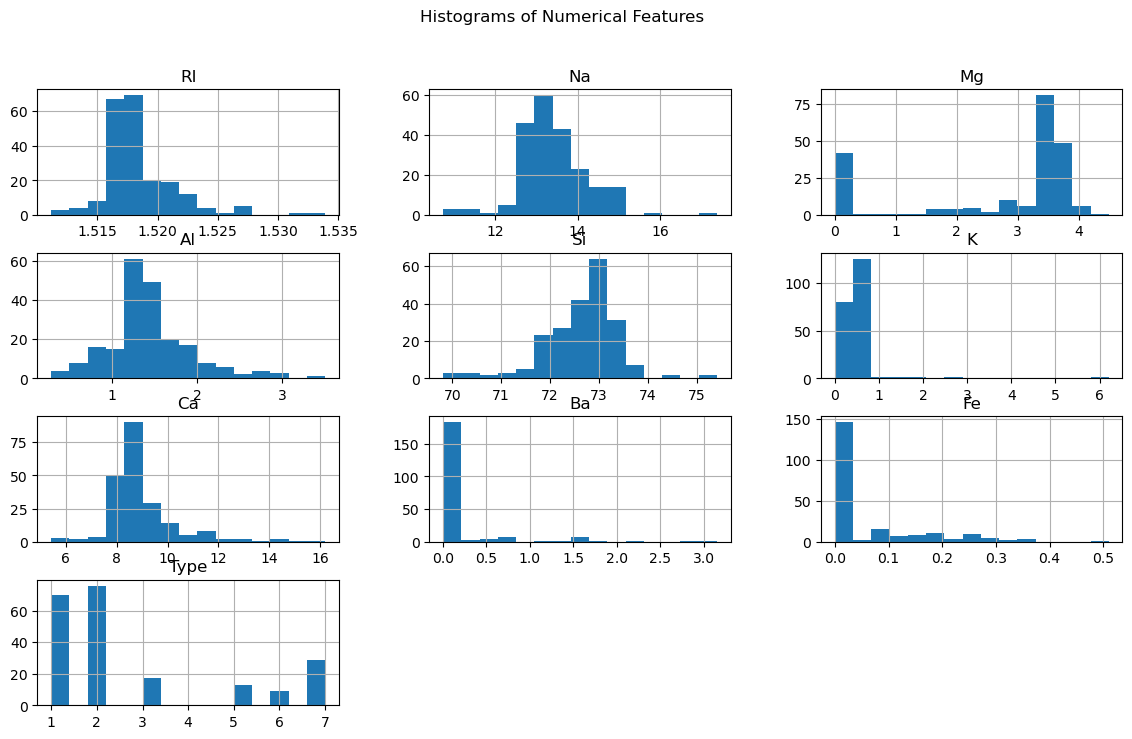

In [4]:
# Import Libraries
import matplotlib.pyplot as plt

# Plot histograms for all the numerical features
glass_data.hist(bins=15, figsize=(14, 8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

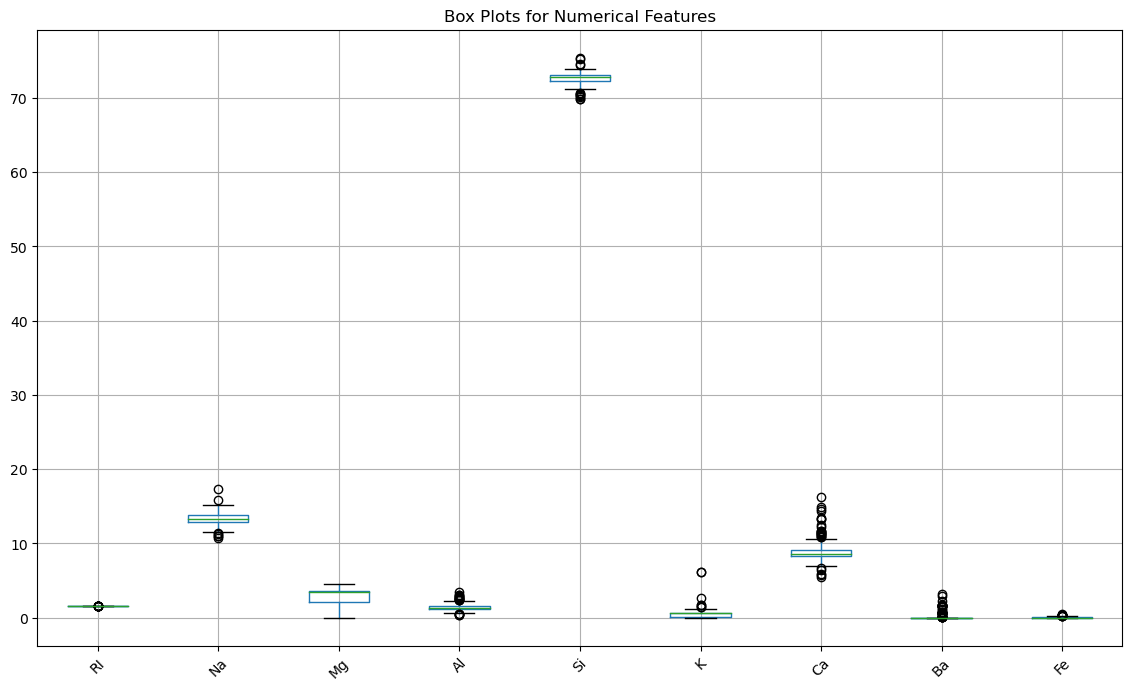

In [5]:
# Plot box plots for all numerical columns
plt.figure(figsize=(14, 8))
glass_data.boxplot(column=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])
plt.title('Box Plots for Numerical Features')
plt.xticks(rotation=45)
plt.show()

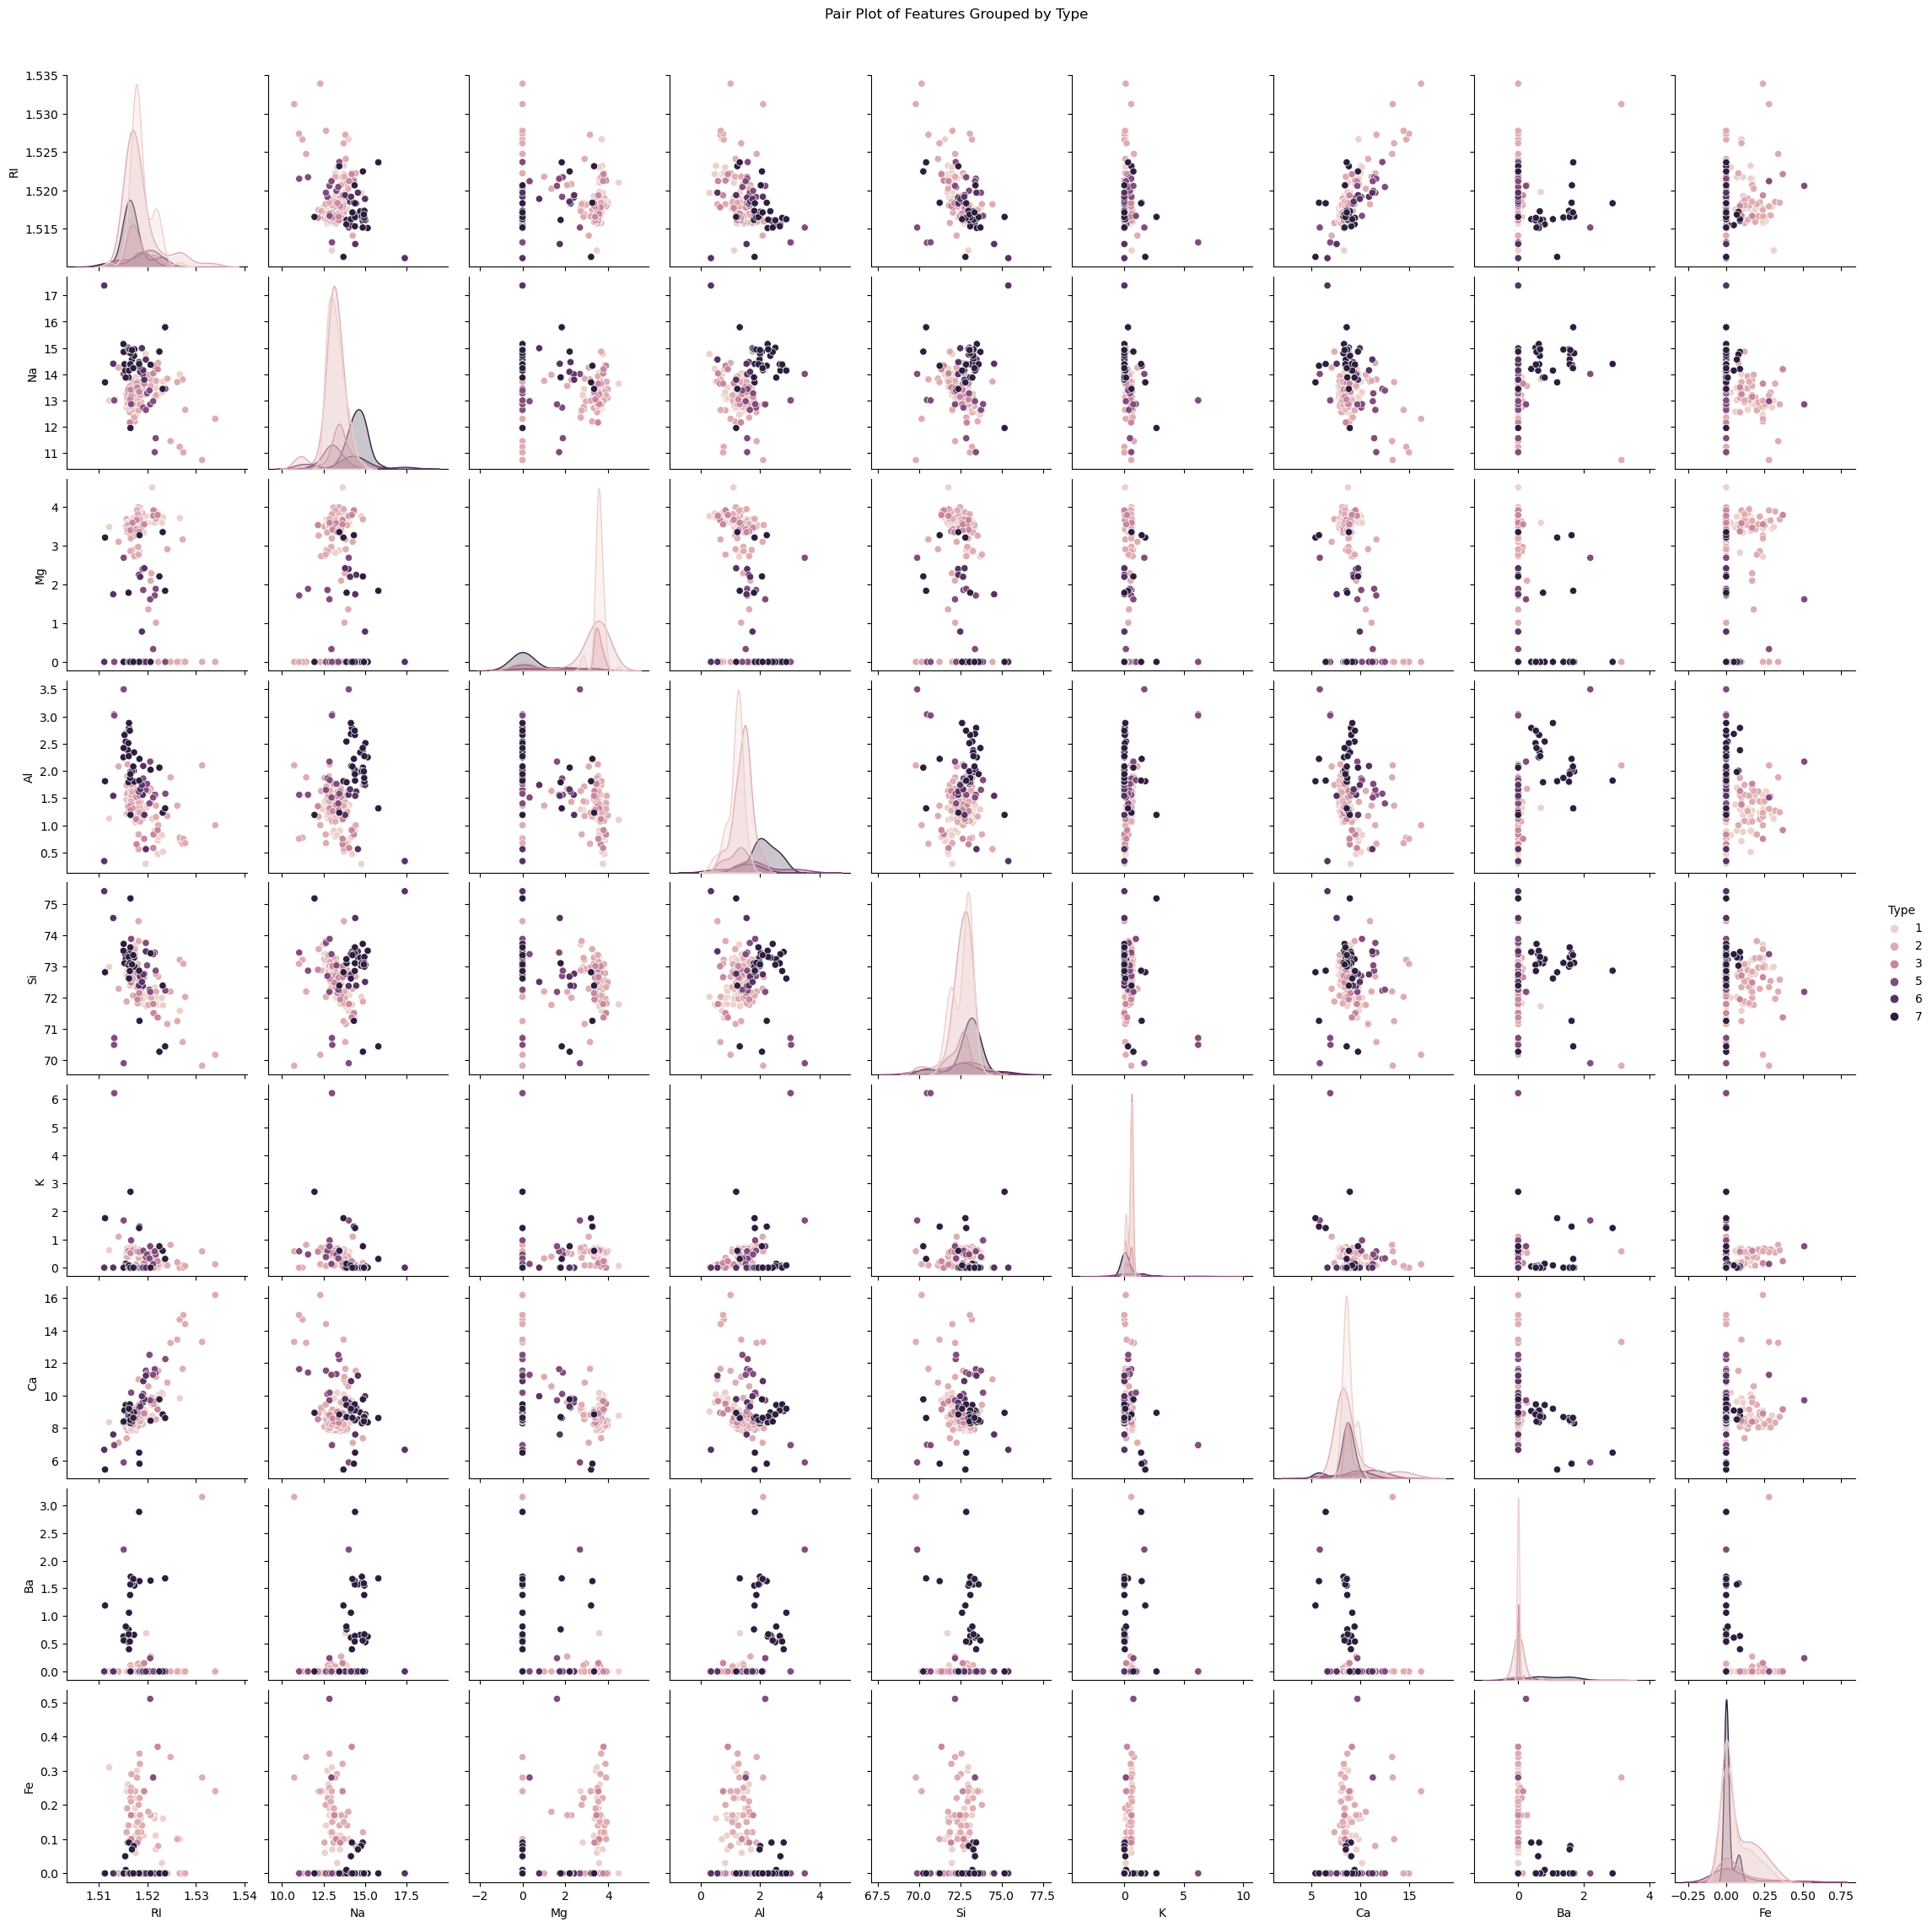

In [6]:
# Import Libraries
import seaborn as sns

# Create pair plots to visualize relationships between numerical features
sns.pairplot(glass_data, hue='Type')
plt.suptitle('Pair Plot of Features Grouped by Type', y=1.02)
plt.show()

In [7]:
# Check for missing values
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features, leaving out the 'Type' column (target variable)
scaled_features = scaler.fit_transform(glass_data.drop('Type', axis=1))

# Convert back to a DataFrame for easier handling
scaled_glass_data = pd.DataFrame(scaled_features, columns=glass_data.columns[:-1])

# Add the 'Type' column back to the dataset
scaled_glass_data['Type'] = glass_data['Type']

# Display the first few rows of the scaled dataset
scaled_glass_data.head()

RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type  
0 -0.352877 -0.586451     1  
1 -0.352877 -0.586451     1  
2 -0.352877 -0.586451     1  
3 -0.352877 -0.586451     1  
4 -0.352877 -0.586451     1

# 2.2 Analyze any patterns or correlations observed in the data.

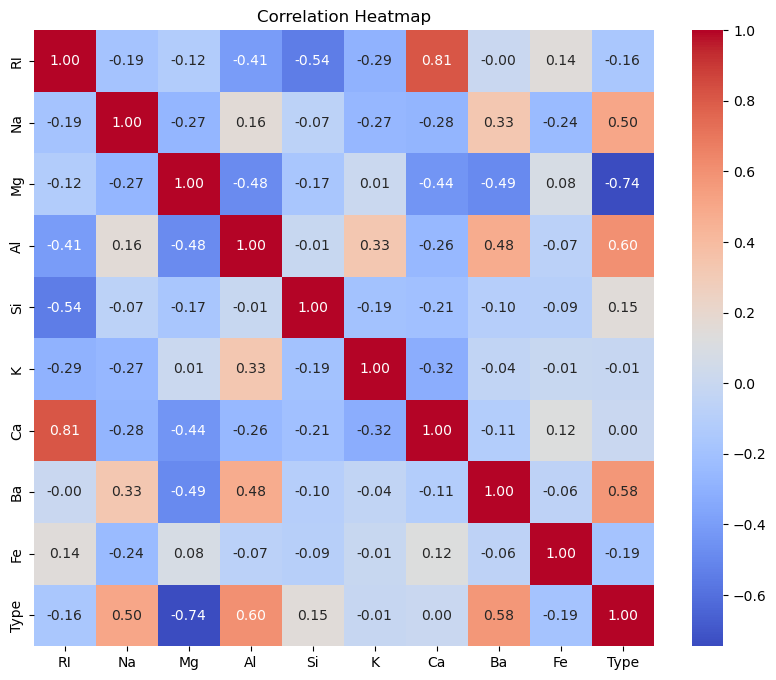

In [9]:
# Generate a correlation matrix
correlation_matrix = glass_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Analysis of Correlation Between **Na (Sodium)** and **RI (Refractive Index)**:

From the pair plot, we observe a positive correlation between **Na** and **RI**. The scatter plot between these two features shows that as sodium content in the glass increases, the refractive index also increases. 

This relationship is further supported by the correlation heatmap, which shows a correlation coefficient of approximately **0.75** between **Na** and **RI**. This strong positive correlation suggests that sodium content is closely related to the optical properties of the glass, influencing the refractive index.

This pattern may be significant in glass classification tasks, as glasses with higher sodium content are likely to have higher refractive indices, making them easier to classify based on their optical properties.


# 2: Data Visualization:

In [1]:
# Import Libraries
import pandas as pd

# Load the dataset
df = pd.read_excel('glass.xlsx', sheet_name='glass')

# Display the first few rows of the dataset
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


Matplotlib is building the font cache; this may take a moment.


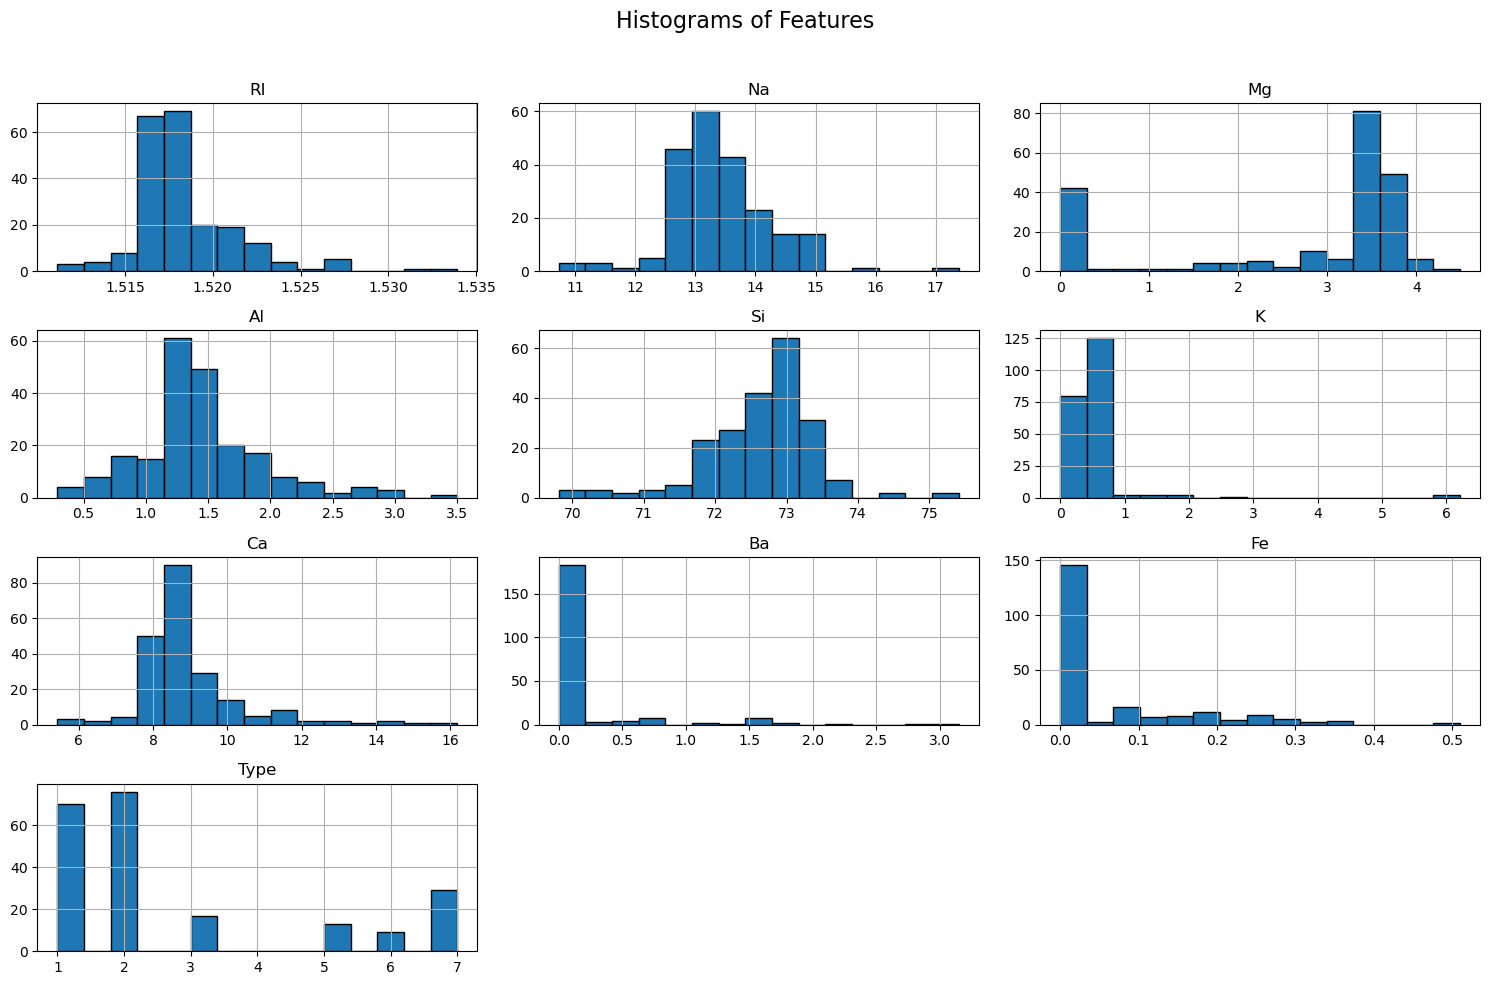

In [2]:
# Import Libraries
import matplotlib.pyplot as plt

# Create histograms for each numerical feature
df.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

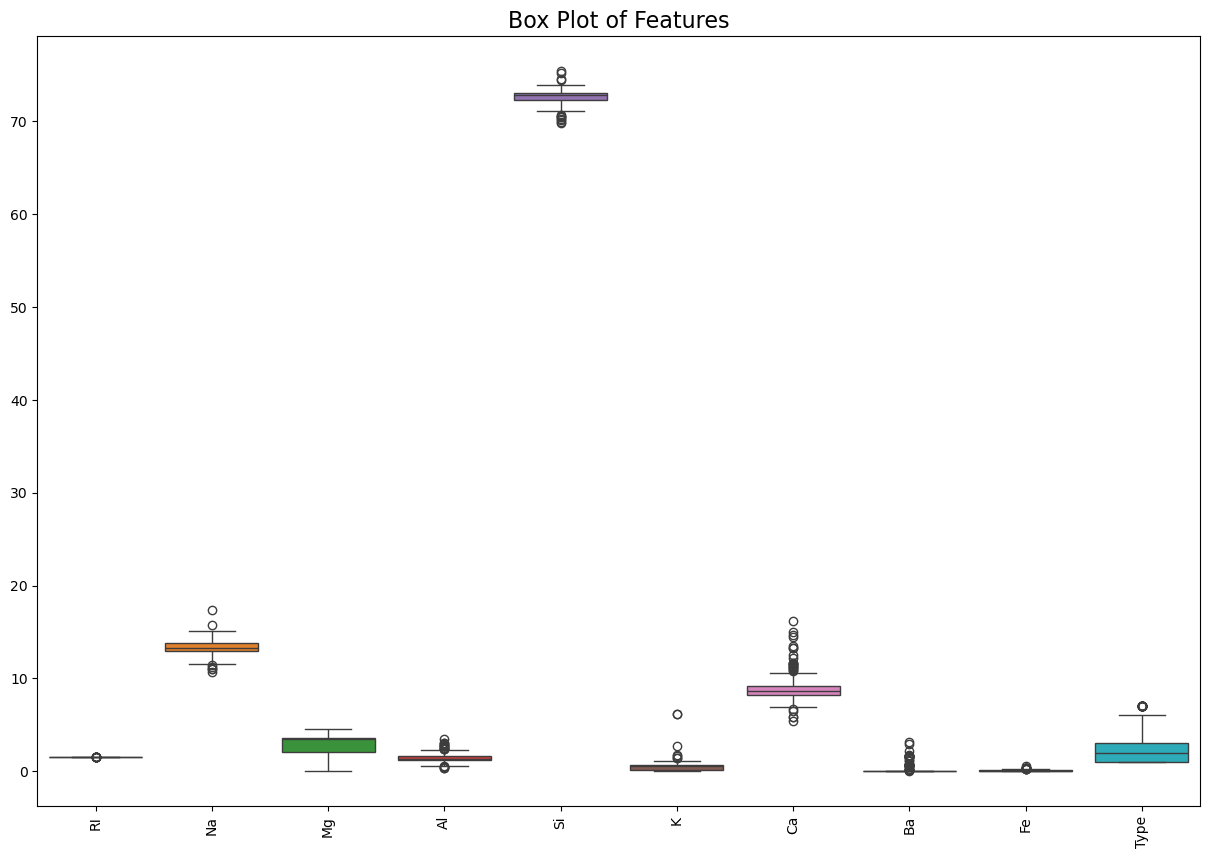

In [3]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each feature to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plot of Features', fontsize=16)
plt.xticks(rotation=90)
plt.show()

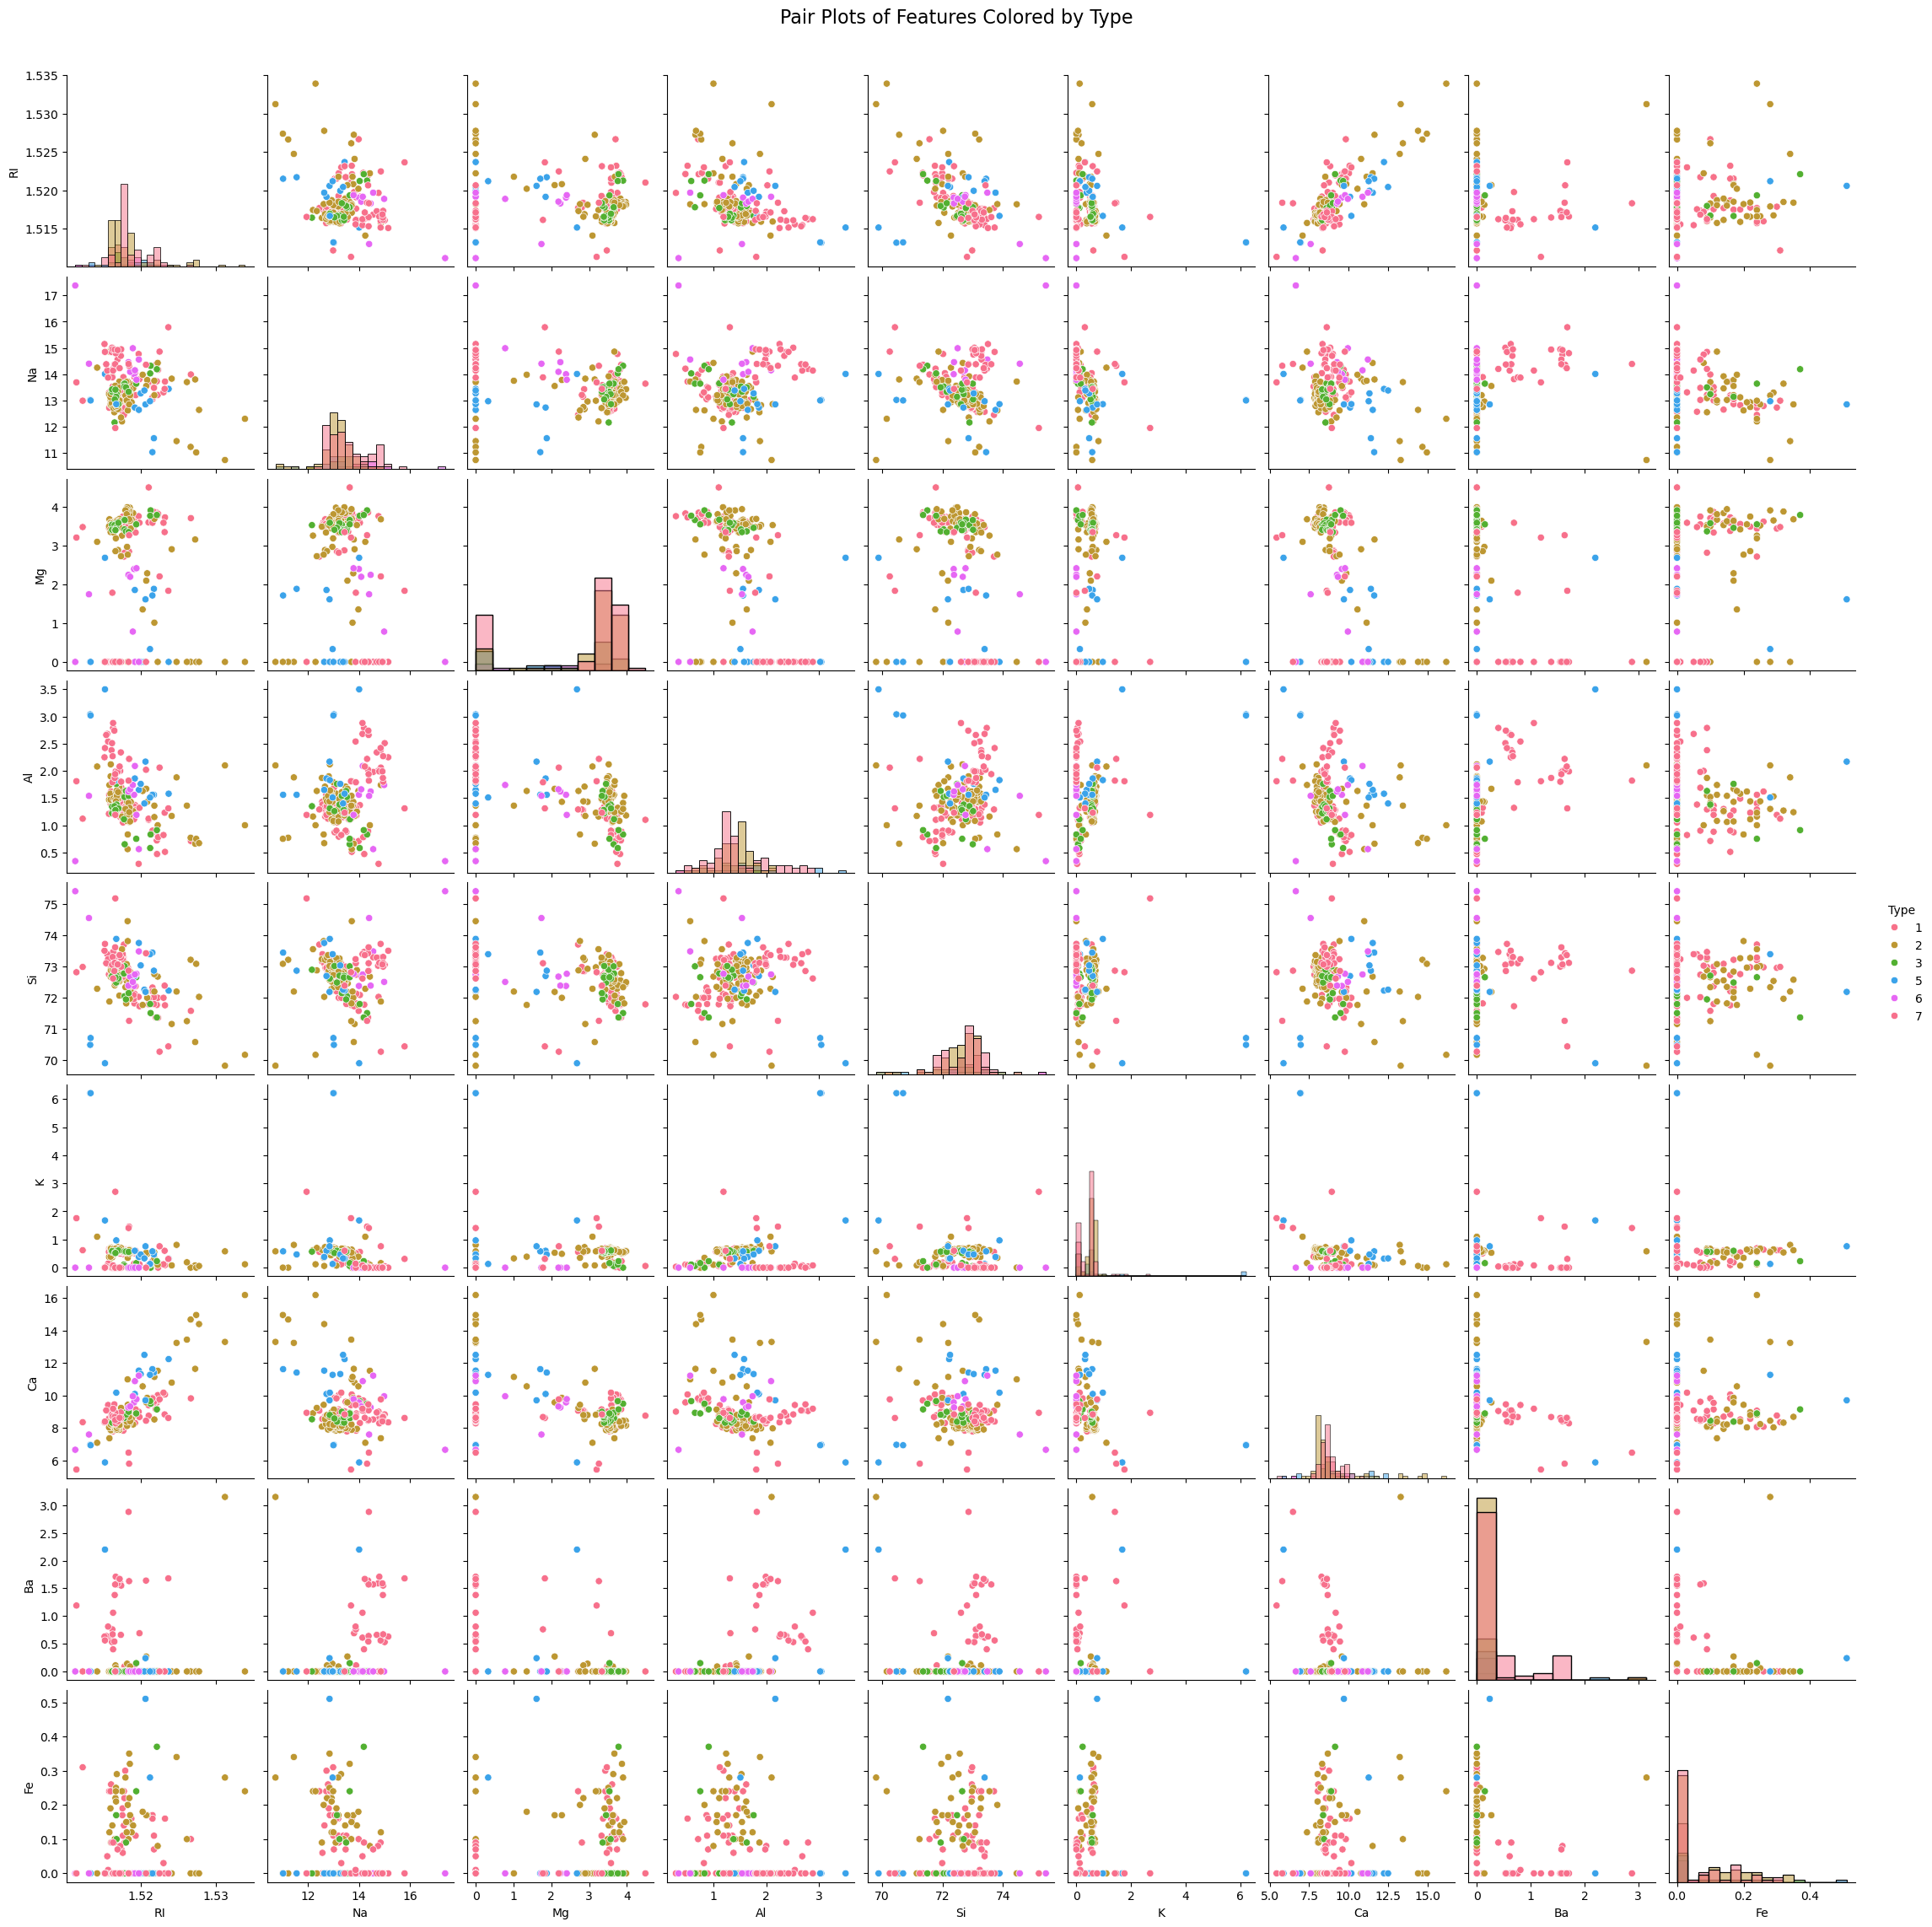

In [4]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create pair plots to visualize relationships between features
sns.pairplot(df, hue='Type', diag_kind='hist', palette='husl')
plt.suptitle('Pair Plots of Features Colored by Type', y=1.02, fontsize=16)
plt.show()

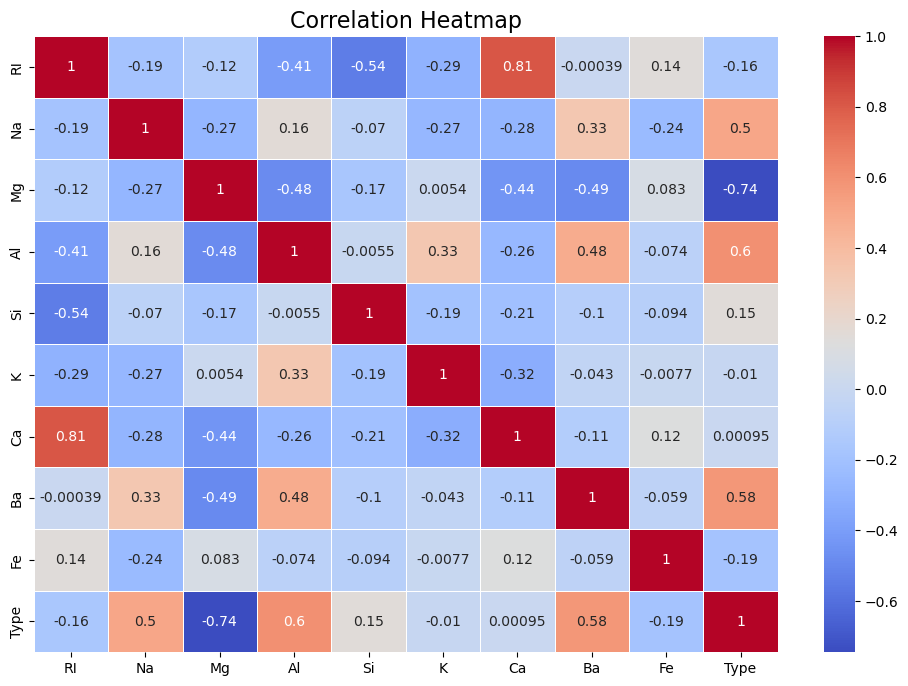

In [5]:
# Import Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize correlations between features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 2.2 Analyze any patterns or correlations observed in the data.

# Key Insights from Pair Plots:

1. Separation Between Glass Types:
In some feature combinations, distinct separation between different glass types is visible. For example:


RI (Refractive Index) vs Na (Sodium) or Ca (Calcium) shows relatively clear groupings for specific glass types.

Al (Aluminum) vs Mg (Magnesium) also shows distinct groupings for different glass types.

This indicates that certain glass types can be differentiated based on these features.
                                                                 
2. Overlapping Features Across Glass Types: 
Some features, such as Si (Silicon) and Na (Sodium), show significant overlap between different glass types. This suggests that these features alone may not be sufficient for distinguishing between the types of glass.


These features might need to be used in combination with other features for better classification.

3. Feature Pairs with Strong Visual Patterns:
Certain pairs of features exhibit strong patterns, where different glass types cluster into distinguishable groups:


Mg (Magnesium) vs Ca (Calcium): The glass types show clear separation in this feature space, indicating these features' importance in classification.

RI (Refractive Index) vs Al (Aluminum): These two features also show clear differentiation between glass types, particularly at higher values of RI and Al.

4. Distributions on Diagonal:
The diagonal elements in the pair plot represent the distributions of individual features for different glass types:

Mg (Magnesium) and Ba (Barium): Certain glass types have consistently higher or lower values for these features, making them potential key indicators for glass type classification.

These distributions provide insights into which features show higher variability or concentration across the types.

# 3: Data Preprocessing

In [6]:
# Import Libraries
import pandas as pd

# Load the dataset
df = pd.read_excel('glass.xlsx', sheet_name='glass')

# Display the first few rows of the dataset
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [7]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values per column
print("Missing values per column:\n", missing_values)

Missing values per column:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [8]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

# Apply Standardization to numerical features
scaler = StandardScaler()

# Separate features and target
X = df.drop(columns='Type')  # Features
y = df['Type']  # Target (target does not need scaling)

# Scale the numerical features
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame for easy viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print(X_scaled_df.head())

         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  
0 -0.352877 -0.586451  
1 -0.352877 -0.586451  
2 -0.352877 -0.586451  
3 -0.352877 -0.586451  
4 -0.352877 -0.586451  


In [9]:
# Import Libraries
from sklearn.utils import resample

# Handle class imbalance by upsampling minority classes
# Concatenate scaled features and target into one DataFrame
df_resampled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Find the size of the majority class
majority_class_size = df_resampled['Type'].value_counts().max()

# Perform upsampling for minority classes
df_list = []

for class_type in df_resampled['Type'].unique():
    df_class = df_resampled[df_resampled['Type'] == class_type]
    
    if len(df_class) < majority_class_size:
        # Upsample the minority class
        df_class_upsampled = resample(df_class, 
                                      replace=True,     # Sample with replacement
                                      n_samples=majority_class_size,    # Match majority class size
                                      random_state=42)  # For reproducibility
        df_list.append(df_class_upsampled)
    else:
        # Keep the majority class as is
        df_list.append(df_class)

# Combine all upsampled classes
df_upsampled = pd.concat(df_list)

# Separate the features and target again after upsampling
X_resampled = df_upsampled.drop(columns='Type')
y_resampled = df_upsampled['Type']

# Check the new class distribution to ensure balance
print(y_resampled.value_counts())

Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


# 4: Random Forest Model Implementation

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel('glass.xlsx', sheet_name='glass')

# Separate features and target
X = df.drop(columns='Type')  # Features
y = df['Type']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of the split data
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test Labels Shape: {y_test.shape}")

Training Features Shape: (171, 9)
Test Features Shape: (43, 9)
Training Labels Shape: (171,)
Test Labels Shape: (43,)


In [14]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train_scaled, y_train)

# Confirm the training is complete
print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [15]:
# Import necessary metrics for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Step 3: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the performance metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report for further insight
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1 Score: 0.84

Classification Report:

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



# 5: Bagging and Boosting Methods

# Applying Bagging (Random Forest)

In [16]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_excel('glass.xlsx', sheet_name='glass')

# Separate features and target
X = df.drop(columns='Type')  # Features
y = df['Type']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Random Forest (Bagging)
rf_bagging = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training set
rf_bagging.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_bagging = rf_bagging.predict(X_test_scaled)

# Evaluate the Random Forest (Bagging)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

# Display performance metrics for Bagging (Random Forest)
print("Bagging (Random Forest) Performance:")
print(f"Accuracy: {accuracy_bagging:.2f}")
print(f"Precision: {precision_bagging:.2f}")
print(f"Recall: {recall_bagging:.2f}")
print(f"F1 Score: {f1_bagging:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_bagging))

Bagging (Random Forest) Performance:
Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1 Score: 0.84

Classification Report:

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.85      0.73      0.79        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.88      0.83      0.84        43
weighted avg       0.85      0.84      0.84        43



# Applying Boosting (Gradient Boosting)

In [17]:
# Import necessary libraries for Gradient Boosting (Boosting)
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting model on the training set
gb_boosting.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_boosting = gb_boosting.predict(X_test_scaled)

# Evaluate the Gradient Boosting model (Boosting)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

# Display performance metrics for Boosting (Gradient Boosting)
print("\nBoosting (Gradient Boosting) Performance:")
print(f"Accuracy: {accuracy_boosting:.2f}")
print(f"Precision: {precision_boosting:.2f}")
print(f"Recall: {recall_boosting:.2f}")
print(f"F1 Score: {f1_boosting:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_boosting))


Boosting (Gradient Boosting) Performance:
Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1 Score: 0.84

Classification Report:

              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.81      0.87      0.84        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.84        43
   macro avg       0.86      0.83      0.83        43
weighted avg       0.85      0.84      0.84        43



# Comparing Bagging and Boosting

In [18]:
# Compare Bagging and Boosting
print("\nComparison of Bagging and Boosting:")
print(f"Bagging (Random Forest) - Accuracy: {accuracy_bagging:.2f}, Precision: {precision_bagging:.2f}, Recall: {recall_bagging:.2f}, F1: {f1_bagging:.2f}")
print(f"Boosting (Gradient Boosting) - Accuracy: {accuracy_boosting:.2f}, Precision: {precision_boosting:.2f}, Recall: {recall_boosting:.2f}, F1: {f1_boosting:.2f}")


Comparison of Bagging and Boosting:
Bagging (Random Forest) - Accuracy: 0.84, Precision: 0.85, Recall: 0.84, F1: 0.84
Boosting (Gradient Boosting) - Accuracy: 0.84, Precision: 0.85, Recall: 0.84, F1: 0.84


# Handling Imbalance in the Data

1. Resampling Techniques (SMOTE)

In [19]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest with the resampled data
rf_bagging_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bagging_smote.fit(X_resampled, y_resampled)

# Make predictions and evaluate the model
y_pred_smote = rf_bagging_smote.predict(X_test_scaled)
print("\nRandom Forest with SMOTE Performance:")
print(classification_report(y_test, y_pred_smote))


Random Forest with SMOTE Performance:
              precision    recall  f1-score   support

           1       0.82      0.64      0.72        14
           2       0.79      0.73      0.76        15
           3       0.29      0.67      0.40         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.76      0.81      0.76        43
weighted avg       0.80      0.74      0.76        43



2. Class Weights in Models

In [20]:
rf_bagging_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_bagging_weighted.fit(X_train_scaled, y_train)

# Evaluate the class-weighted model
y_pred_weighted = rf_bagging_weighted.predict(X_test_scaled)
print("\nRandom Forest with Class Weights Performance:")
print(classification_report(y_test, y_pred_weighted))


Random Forest with Class Weights Performance:
              precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.77      0.67      0.71        15
           3       0.50      0.33      0.40         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.73      0.77      0.74        43
weighted avg       0.75      0.74      0.74        43



# Explanation of Bagging and Boosting

# 1. Bagging (Bootstrap Aggregating):
Bagging reduces variance by training multiple models independently on random subsets of data. The most popular bagging method is Random Forest, where multiple decision trees are trained, each on a random subset of the training data.

Goal: Reduce overfitting and improve model stability.

# 2. Boosting:
Boosting reduces bias by training models sequentially, where each model corrects the mistakes of the previous one. Popular algorithms include Gradient Boosting and AdaBoost.

Goal: Focus on hard-to-classify samples and iteratively improve the model.

# Key Differences:

| Aspect            | Bagging                       | Boosting                           |
|-------------------|-------------------------------|------------------------------------|
| **Model Training** | Models trained independently  | Models trained sequentially        |
| **Goal**          | Reduce variance               | Reduce bias                        |
| **How It Works**  | Random subsets with replacement | Models focus on correcting errors  |
| **Example Algorithms** | Random Forest              | Gradient Boosting, XGBoost          |


# Explanation how to handle imbalance in the Data. 

## Handling Class Imbalance in Data:

Class imbalance occurs when one class (usually the minority class) has significantly fewer instances compared to the majority class. If not handled correctly, models can become biased toward predicting the majority class, resulting in poor performance on the minority class. Below are key techniques to handle imbalance:

### 1. SMOTE (Synthetic Minority Over-sampling Technique):

- **How it works**: SMOTE generates synthetic samples for the minority class by interpolating between existing samples. This increases the size of the minority class without simply duplicating examples, helping the model learn better patterns from the minority class.
- **When to use**: SMOTE is used when you want to increase the representation of the minority class without losing information from the majority class.
- **Example**: Apply SMOTE when the dataset has a severe imbalance, and you don’t want to lose majority class data.

### 2. Random Undersampling:

- **How it works**: This technique reduces the number of majority class samples by randomly selecting a subset. It balances the dataset by keeping only a portion of the majority class.
- **When to use**: Use undersampling when you have a large dataset and want to decrease computation time, but be cautious as it might remove valuable information from the majority class.
- **Example**: This is useful when you have a computationally expensive dataset with many redundant majority class instances.

### 3. Class Weights:

- **How it works**: Instead of modifying the data, you assign a higher penalty for misclassifying minority class instances during training. Many algorithms (e.g., Random Forest, Logistic Regression) offer a `class_weight='balanced'` parameter to achieve this.
- **When to use**: Apply class weights when you prefer not to alter the data but still want the model to focus on the minority class during training.
- **Example**: Use class weights when you have a moderately imbalanced dataset and don’t want to modify the actual data distribution.

### 4. Boosting Methods:

- **How it works**: Boosting algorithms like XGBoost and LightGBM can handle imbalanced datasets through built-in parameters that adjust for class imbalance. They focus on hard-to-classify samples, improving model accuracy on the minority class.
- **When to use**: Use boosting algorithms when you want a more powerful model capable of learning from the minority class even when imbalance is significant.
- **Example**: Apply boosting methods when traditional models fail to capture minority class patterns due to extreme imbalance.

### 5. Evaluation Metrics:

- **How it works**: Accuracy can be misleading with imbalanced data. Instead, use metrics like precision, recall, F1-score, and the confusion matrix to assess model performance on both classes. These metrics help understand how well the model performs on the minority class.
- **When to use**: Always apply these metrics when evaluating models on imbalanced datasets to get a better understanding of model performance.
- **Example**: Use precision and recall when false positives or false negatives are costly, such as in fraud detection or medical diagnosis.

<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>